In [1]:
import numpy as np
import pandas as pd

### Programming Problem 1. (Classifier Competition)

In [654]:
def get_features(words):
    features = []
    letters = set("abcdefghijklmnopqrstuvwxyz")
    suffixes = []
    for word in words:
        suffixes.append(word[-3:])
    for word in words:
        word = word.lower()
        uni_counts = {}
        bi_counts = {}
        suffix_counts = {}
        for letter in word:
            if letter in letters:
                if letter in uni_counts:
                    uni_counts[letter] += 1
                else:
                    uni_counts[letter] = 1
        for i in range(len(word) - 1):
            bi = word[i:i+2]
            if bi in bi_counts:
                bi_counts[bi] += 1
            else:
                bi_counts[bi] = 1
        for suffix in suffixes:
            if word.endswith(suffix):
                suffix_counts[suffix] = 1
            else:
                suffix_counts[suffix] = 0  
        feature_vector = {**uni_counts, **bi_counts, **suffix_counts}
        features.append(feature_vector)
    
    return features, suffixes

def train(train_words, train_labels):
    train_features, train_suffixes = get_features(train_words)
    prior_probs = {"spanish": train_labels.count("spanish") / len(train_labels), "french": train_labels.count("french") / len(train_labels)}
    feature_counts = {"spanish": {}, "french": {}}
    total_counts = {"spanish": 0, "french": 0}
    for i, features in enumerate(train_features):
        label = train_labels[i]
        for feature, count in features.items():
            if feature not in feature_counts[label]:
                feature_counts[label][feature] = 0
            feature_counts[label][feature] += count
            total_counts[label] += count
    feature_probs = {
        "spanish": {feature: feature_counts["spanish"][feature] / total_counts["spanish"] for feature in feature_counts["spanish"]},
        "french": {feature: feature_counts["french"][feature] / total_counts["french"] for feature in feature_counts["french"]}
    }
    
    return prior_probs, feature_probs

def predict(test_words, prior_probs, feature_probs):
    test_features, test_suffixes = get_features(test_words)
    predictions = []
    
    for features in test_features:
        spanish_prob = prior_probs["spanish"]
        french_prob = prior_probs["french"]
        for feature, count in features.items():
            if feature in feature_probs["spanish"]:
                spanish_prob *= feature_probs["spanish"][feature] ** count
            if feature in feature_probs["french"]:
                french_prob *= feature_probs["french"][feature] ** count
        for suffix in test_suffixes:
            if suffix in features and features[suffix] == 1:
                if suffix in feature_probs["spanish"]:
                    spanish_prob *= feature_probs["spanish"][suffix]
                else:
                    spanish_prob *= 1
                if suffix in feature_probs["french"]:
                    french_prob *= feature_probs["french"][suffix]
                else:
                    french_prob *= 1
        if spanish_prob > french_prob:
            predictions.append("spanish")
        else:
            predictions.append("french")  
    return predictions

def classify(train_words, train_labels, test_words):
    train_labels = list(train_labels) 
    prior_probs, feature_probs= train(train_words, train_labels)
    return predict(test_words, prior_probs, feature_probs)


In [657]:
file_path_1 = "train.csv"
tra = pd.read_csv(file_path_1)
train_words = tra["word"].tolist()
train_labels = tra["label"].tolist()
file_path_2 = "test_3.csv"
test = pd.read_csv(file_path_2)
test_words = test["word"].tolist()
test_labels = test["label"].tolist()
hh = classify(train_words, train_labels, test_words)

In [658]:
(np.array(hh) == np.array(test_labels)).mean()

0.8085

### Problem 1

In [1]:
import numpy as np
from scipy.optimize import fmin
import matplotlib.pyplot as plt

data = np.genfromtxt('data.csv', delimiter=',')
x, y = data[:, 0], data[:, 1]

#### (a)

In [669]:
def mse(w1):
    w0 = 2
    h_x = w0 + w1 * x
    return np.mean((h_x - y) ** 2)

In [670]:
mse(1)

139.60271462

#### (b)

In [675]:
def log_likelihood(w1):
    sigma = 4
    w0 = 2
    h_x = w0 + w1 * x
    return -np.sum(((h_x - y) ** 2) / (2 * sigma**2)) - len(x) * np.log(np.sqrt(2 * np.pi) * sigma)


In [676]:
log_likelihood(1)

-333.3908863099782

#### (c)

In [686]:
w1_min = fmin(mse, 0)[0]

Optimization terminated successfully.
         Current function value: 14.069906
         Iterations: 28
         Function evaluations: 56


In [687]:
print(f'The value of w1 that minimizes the mean squared error is w1 = {w1_min}')

The value of w1 that minimizes the mean squared error is w1 = 3.0071875000000032


In [688]:
closed_form_sol_w1 = np.cov(x, y, bias=True)[0, 1] / np.var(x)
closed_form_sol_w1

2.980895446904831

#### 3.0072 is approximately 2.98 so I think I got it right

#### (d)

In [689]:
def neg_log_likelihood(w1):
    return -log_likelihood(w1)

In [692]:
w1_max = fmin(neg_log_likelihood, 0)[0]

Optimization terminated successfully.
         Current function value: 137.245873
         Iterations: 28
         Function evaluations: 56


In [695]:
print(f'The value of w1 that maximizes the log likelihood is w1 = {w1_max}')

The value of w1 that maximizes the log likelihood is w1 = 3.0071875000000032


#### (e)

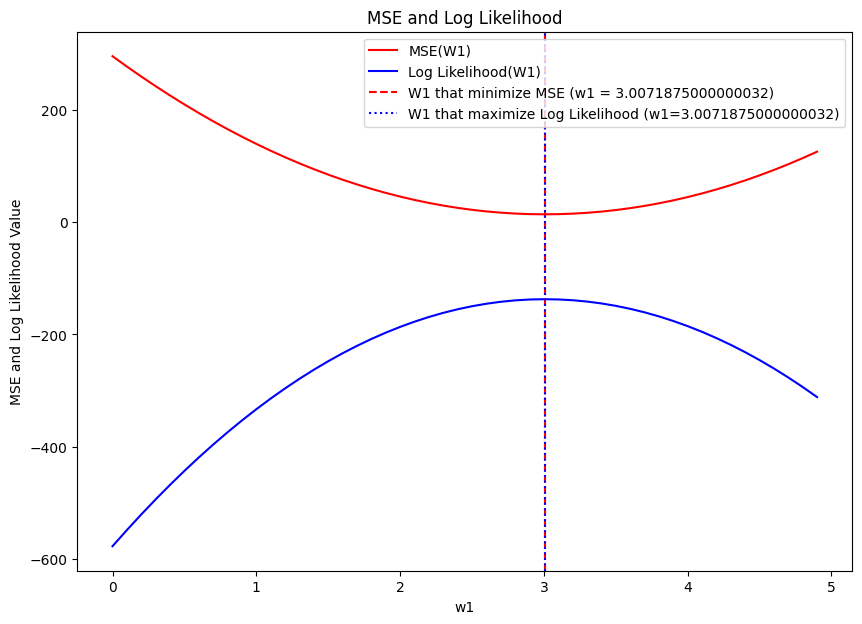

In [710]:
w1s = np.arange(0,5,0.1)
mses = [mse(w1) for w1 in w1s]
log_likelihoods = [log_likelihood(w1) for w1 in w1s]
plt.figure(figsize=(10, 7))
plt.plot(w1s, mses, label="MSE(W1)", color="red")
plt.plot(w1s, log_likelihoods, label="Log Likelihood(W1)", color="blue")
plt.axvline(x=w1_min, color="red", linestyle="--", label=f"W1 that minimize MSE (w1 = {w1_min})")
plt.axvline(x=w1_max, color="blue", linestyle=":", label=f"W1 that maximize Log Likelihood (w1={w1_max})")
plt.xlabel("w1")
plt.ylabel("MSE and Log Likelihood Value")
plt.title("MSE and Log Likelihood")
plt.legend()
plt.show()

In [2]:
data = pd.DataFrame({
    "Temperature": [65, 72, 79, 55, 62, 71, 73],
    "Pressure": [1001, 1003, 1030, 1022, 1025, 1010, 1011],
    "Rain": ["Yes", "Yes", "No", "Yes", "No", "Yes", "No"]
})

# Function to compute Gini Impurity
def gini_impurity(labels):
    """Calculate the Gini impurity for a set of labels."""
    unique_labels, counts = np.unique(labels, return_counts=True)
    probabilities = counts / counts.sum()
    return 1 - np.sum(probabilities ** 2)

# Function to calculate Gini impurity of a split
def gini_split(data, feature, threshold):
    """Calculate the Gini impurity for a given split."""
    left_split = data[data[feature] < threshold]["Rain"]
    right_split = data[data[feature] >= threshold]["Rain"]
    
    # Calculate weighted Gini impurity
    total = len(data)
    gini_left = gini_impurity(left_split)
    gini_right = gini_impurity(right_split)
    
    weighted_gini = (len(left_split) / total) * gini_left + (len(right_split) / total) * gini_right
    return weighted_gini

# Generate all possible threshold splits
possible_splits = []
for feature in ["Temperature", "Pressure"]:
    unique_values = np.sort(data[feature].unique())
    thresholds = (unique_values[:-1] + unique_values[1:]) / 2  # Midpoints between unique values
    
    for threshold in thresholds:
        gini = gini_split(data, feature, threshold)
        possible_splits.append((feature, threshold, gini))

# Find the best split (minimum Gini impurity)
best_split = min(possible_splits, key=lambda x: x[2])

# Display results
best_split

('Pressure', 1010.5, 0.21428571428571427)

In [3]:
possible_splits

[('Temperature', 58.5, 0.42857142857142855),
 ('Temperature', 63.5, 0.4857142857142857),
 ('Temperature', 68.0, 0.47619047619047616),
 ('Temperature', 71.5, 0.40476190476190477),
 ('Temperature', 72.5, 0.22857142857142845),
 ('Temperature', 76.0, 0.38095238095238093),
 ('Pressure', 1002.0, 0.42857142857142855),
 ('Pressure', 1006.5, 0.34285714285714286),
 ('Pressure', 1010.5, 0.21428571428571427),
 ('Pressure', 1016.5, 0.40476190476190477),
 ('Pressure', 1023.5, 0.22857142857142845),
 ('Pressure', 1027.5, 0.38095238095238093)]

In [6]:
# Store results for display
gini_results = []

# Generate all possible threshold splits for Temperature and Pressure
for feature in ["Temperature", "Pressure"]:
    unique_values = np.sort(data[feature].unique())
    thresholds = (unique_values[:-1] + unique_values[1:]) / 2  # Midpoints between unique values

    for threshold in thresholds:
        gini = gini_split(data, feature, threshold)
        gini_results.append((feature, threshold, gini))

# Convert results to DataFrame for better readability
gini_df = pd.DataFrame(gini_results, columns=["Feature", "Threshold", "Gini"])

# Find the best split (minimum Gini impurity)
best_split = gini_df.loc[gini_df["Gini"].idxmin()]

from tabulate import tabulate

# Convert results to a readable table format
gini_table = tabulate(gini_results, headers=["Feature", "Threshold", "Gini"], tablefmt="grid")

# Print the table
print("Gini Impurity Calculations for All Possible Splits:")
print(gini_table)

# Highlight the best split
print("\nBest Split:")
print(best_split)

Gini Impurity Calculations for All Possible Splits:
+-------------+-------------+----------+
| Feature     |   Threshold |     Gini |
+=============+=============+==========+
| Temperature |        58.5 | 0.428571 |
+-------------+-------------+----------+
| Temperature |        63.5 | 0.485714 |
+-------------+-------------+----------+
| Temperature |        68   | 0.47619  |
+-------------+-------------+----------+
| Temperature |        71.5 | 0.404762 |
+-------------+-------------+----------+
| Temperature |        72.5 | 0.228571 |
+-------------+-------------+----------+
| Temperature |        76   | 0.380952 |
+-------------+-------------+----------+
| Pressure    |      1002   | 0.428571 |
+-------------+-------------+----------+
| Pressure    |      1006.5 | 0.342857 |
+-------------+-------------+----------+
| Pressure    |      1010.5 | 0.214286 |
+-------------+-------------+----------+
| Pressure    |      1016.5 | 0.404762 |
+-------------+-------------+----------+
| Pre

In [7]:
print("Detailed Gini Impurity Calculations for All Possible Splits:\n")

for feature in ["Temperature", "Pressure"]:
    unique_values = np.sort(data[feature].unique())
    thresholds = (unique_values[:-1] + unique_values[1:]) / 2  # Midpoints between unique values

    print(f"Feature: {feature}\n")
    for threshold in thresholds:
        gini = gini_split(data, feature, threshold)
        
        # Manually compute left and right split
        left_split = data[data[feature] < threshold]["Rain"]
        right_split = data[data[feature] >= threshold]["Rain"]
        
        gini_left = gini_impurity(left_split)
        gini_right = gini_impurity(right_split)
        
        print(f"  Threshold: {threshold}")
        print(f"    Left Split: {list(left_split.values)} -> Gini: {gini_left:.4f}")
        print(f"    Right Split: {list(right_split.values)} -> Gini: {gini_right:.4f}")
        print(f"    Weighted Gini: {gini:.4f}\n")

# Print the best split separately
print("\nBest Split (Min Gini Impurity):")
print(f"Feature: {best_split['Feature']}, Threshold: {best_split['Threshold']}, Gini: {best_split['Gini']:.4f}")

Detailed Gini Impurity Calculations for All Possible Splits:

Feature: Temperature

  Threshold: 58.5
    Left Split: ['Yes'] -> Gini: 0.0000
    Right Split: ['Yes', 'Yes', 'No', 'No', 'Yes', 'No'] -> Gini: 0.5000
    Weighted Gini: 0.4286

  Threshold: 63.5
    Left Split: ['Yes', 'No'] -> Gini: 0.5000
    Right Split: ['Yes', 'Yes', 'No', 'Yes', 'No'] -> Gini: 0.4800
    Weighted Gini: 0.4857

  Threshold: 68.0
    Left Split: ['Yes', 'Yes', 'No'] -> Gini: 0.4444
    Right Split: ['Yes', 'No', 'Yes', 'No'] -> Gini: 0.5000
    Weighted Gini: 0.4762

  Threshold: 71.5
    Left Split: ['Yes', 'Yes', 'No', 'Yes'] -> Gini: 0.3750
    Right Split: ['Yes', 'No', 'No'] -> Gini: 0.4444
    Weighted Gini: 0.4048

  Threshold: 72.5
    Left Split: ['Yes', 'Yes', 'Yes', 'No', 'Yes'] -> Gini: 0.3200
    Right Split: ['No', 'No'] -> Gini: 0.0000
    Weighted Gini: 0.2286

  Threshold: 76.0
    Left Split: ['Yes', 'Yes', 'Yes', 'No', 'Yes', 'No'] -> Gini: 0.4444
    Right Split: ['No'] -> Gini: 0.